<a href="https://colab.research.google.com/github/Vecheslav-Eremeev/sklearn_projects/blob/main/Boston_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet, Lars, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

Load data

In [ ]:
dataset = load_boston()
X = dataset.data
y = dataset.target

In [ ]:
X.shape, y.shape

((506, 13), (506,))

In [ ]:
test_size = 0.2
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,  random_state=random_seed)

In [ ]:
num_folds = 10
n_iter = 1000
n_estimators = 100
scoring = 'r2'

Train models

In [ ]:
models = [
          LinearRegression(),
          Ridge(),
          Lasso(),
          ElasticNet(),
          Lars(),
          BayesianRidge(),
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          LinearSVR(),
          SVR(),
          RandomForestRegressor(n_estimators=n_estimators),
          AdaBoostRegressor(n_estimators=n_estimators),
          BaggingRegressor(n_estimators=n_estimators),
          GradientBoostingRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators),
          HistGradientBoostingRegressor(),
          XGBRegressor(silent=True),
          LGBMRegressor(silent=True)
]

In [ ]:
pipelines = []
scores = []
names = []
results = []
predictions = []
msgs = []

In [ ]:
for model in models:
  name = model.__class__.__name__
  pipelines.append((name, model))

In [ ]:
def train_models(pipelines):
  for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=random_seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    predictions.append(predict)
    m_score = model.score(X_test, y_test)
    scores.append(m_score)
    msg = "%s: train = %.3f (%.3f) / test = %.3f" % (name, cv_results.mean(),
                           cv_results.std(), m_score)
    msgs.append(msg)
    print(msg)

In [ ]:
def show_result(title='Title'):
  fig = plt.figure()
  fig.suptitle(title)
  ax = fig.add_subplot(111)
  red_square = dict(markerfacecolor='r', marker='s')
  plt.boxplot(results, flierprops=red_square)
  ax.set_xticklabels(names, rotation=80)
  plt.show()

In [ ]:
train_models(pipelines)

LinearRegression: train = 0.723 (0.089) / test = 0.669
Ridge: train = 0.721 (0.093) / test = 0.666
Lasso: train = 0.673 (0.087) / test = 0.667
ElasticNet: train = 0.671 (0.082) / test = 0.673
Lars: train = 0.719 (0.092) / test = 0.669
BayesianRidge: train = 0.714 (0.095) / test = 0.664
KNeighborsRegressor: train = 0.465 (0.235) / test = 0.647
DecisionTreeRegressor: train = 0.611 (0.260) / test = 0.860
LinearSVR: train = 0.474 (0.239) / test = 0.095
SVR: train = 0.181 (0.141) / test = 0.279
RandomForestRegressor: train = 0.832 (0.069) / test = 0.875
AdaBoostRegressor: train = 0.797 (0.086) / test = 0.842
BaggingRegressor: train = 0.835 (0.067) / test = 0.885
GradientBoostingRegressor: train = 0.856 (0.062) / test = 0.915
ExtraTreesRegressor: train = 0.867 (0.057) / test = 0.866
HistGradientBoostingRegressor: train = 0.837 (0.074) / test = 0.862
XGBRegressor: train = 0.858 (0.050) / test = 0.901
LGBMRegressor: train = 0.839 (0.076) / test = 0.886


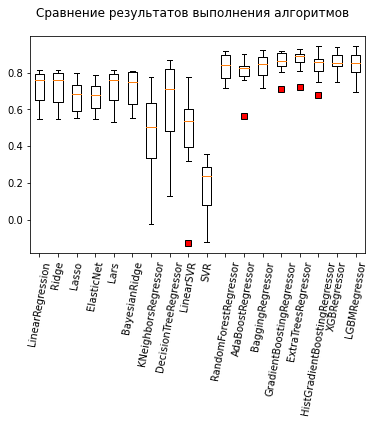

In [ ]:
show_result('Сравнение результатов выполнения алгоритмов')

Standart Scaler

In [ ]:
pipelines = []
scores = []
names = []
results = []
predictions = []
msgs = []

In [ ]:
for model in models:
  name = 'SS ' + model.__class__.__name__
  pipelines.append((name, Pipeline([('Scaler', StandardScaler()),
                                    (model.__class__.__name__, model)])))

In [ ]:
train_models(pipelines)

SS LinearRegression: train = 0.723 (0.089) / test = 0.669
SS Ridge: train = 0.723 (0.089) / test = 0.668
SS Lasso: train = 0.659 (0.109) / test = 0.624
SS ElasticNet: train = 0.648 (0.119) / test = 0.613
SS Lars: train = 0.719 (0.092) / test = 0.669
SS BayesianRidge: train = 0.723 (0.093) / test = 0.667
SS KNeighborsRegressor: train = 0.713 (0.106) / test = 0.719
SS DecisionTreeRegressor: train = 0.636 (0.262) / test = 0.698
SS LinearSVR: train = 0.694 (0.140) / test = 0.591
SS SVR: train = 0.635 (0.082) / test = 0.650
SS RandomForestRegressor: train = 0.829 (0.073) / test = 0.880
SS AdaBoostRegressor: train = 0.795 (0.087) / test = 0.822
SS BaggingRegressor: train = 0.833 (0.063) / test = 0.878
SS GradientBoostingRegressor: train = 0.856 (0.059) / test = 0.916
SS ExtraTreesRegressor: train = 0.863 (0.052) / test = 0.864
SS HistGradientBoostingRegressor: train = 0.837 (0.074) / test = 0.862
SS XGBRegressor: train = 0.858 (0.050) / test = 0.901
SS LGBMRegressor: train = 0.835 (0.075) / 

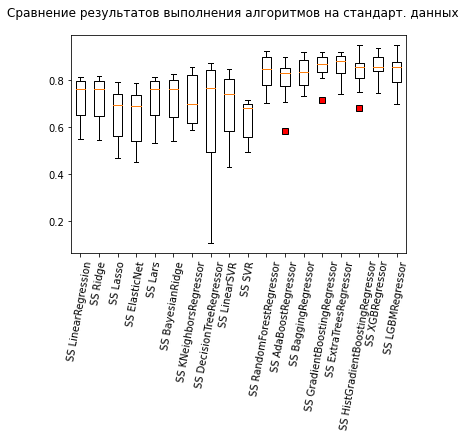

In [ ]:
show_result('Сравнение результатов выполнения алгоритмов на стандарт. данных')

Normizer

In [ ]:
pipelines = []
scores = []
names = []
results = []
predictions = []
msgs = []

In [ ]:
for model in models:
  name = 'N ' + model.__class__.__name__
  pipelines.append((name, Pipeline([('Normalizer', Normalizer()),
                                    (model.__class__.__name__, model)])))

In [ ]:
train_models(pipelines)

N LinearRegression: train = 0.724 (0.124) / test = 0.685
N Ridge: train = 0.275 (0.128) / test = 0.362
N Lasso: train = -0.019 (0.018) / test = -0.023
N ElasticNet: train = 0.002 (0.018) / test = 0.001
N Lars: train = 0.724 (0.124) / test = 0.685
N BayesianRidge: train = 0.717 (0.128) / test = 0.691
N KNeighborsRegressor: train = 0.516 (0.170) / test = 0.655
N DecisionTreeRegressor: train = 0.673 (0.139) / test = 0.668
N LinearSVR: train = 0.164 (0.110) / test = 0.250
N SVR: train = 0.189 (0.126) / test = 0.301
N RandomForestRegressor: train = 0.838 (0.074) / test = 0.868
N AdaBoostRegressor: train = 0.789 (0.073) / test = 0.788
N BaggingRegressor: train = 0.832 (0.074) / test = 0.860
N GradientBoostingRegressor: train = 0.854 (0.077) / test = 0.873
N ExtraTreesRegressor: train = 0.872 (0.051) / test = 0.869
N HistGradientBoostingRegressor: train = 0.837 (0.067) / test = 0.865
N XGBRegressor: train = 0.851 (0.064) / test = 0.856
N LGBMRegressor: train = 0.841 (0.056) / test = 0.872


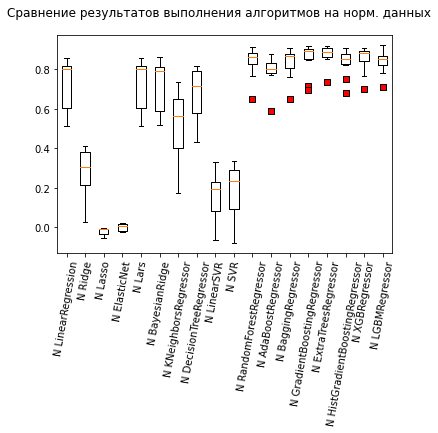

In [ ]:
show_result('Сравнение результатов выполнения алгоритмов на норм. данных')